In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement

Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

2016-08-23 00:00:00


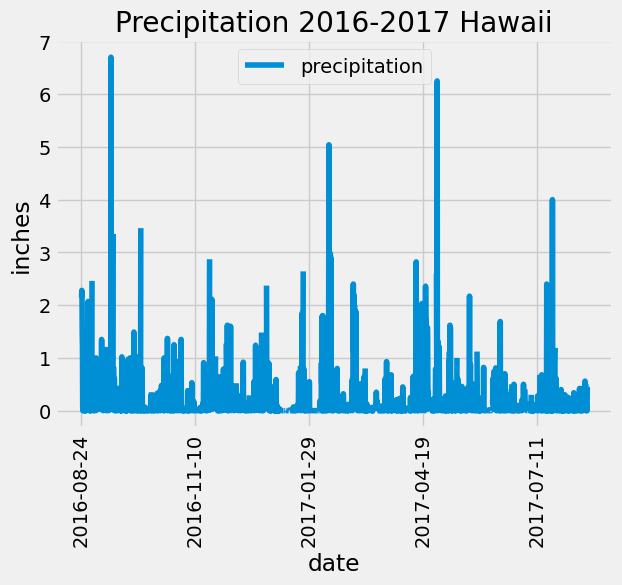

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date
# Calculate the date one year from the last date in data set.
year_ago = dt.datetime(2017, 8, 23) - dt.timedelta(days=365)
print(year_ago)

# Perform a query to retrieve the data and precipitation scores
precp_score = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()
precp_score
# Save the query results as a Pandas DataFrame. Explicitly set the column names
precp_df = pd.DataFrame(precp_score, columns=['date', 'precipitation'])
precp_df 
# Sort the dataframe by date
date_precp_df = precp_df.sort_values('date')
date_precp_df
# Use Pandas Plotting with Matplotlib to plot the data
date_precp_df.plot(x='date', y='precipitation', rot='vertical')
plt.title('Precipitation 2016-2017 Hawaii')
plt.ylabel('inches')
plt.savefig('./Images/precipitationSav.png')
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
date_precp_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(Station.station)).all()[0][0]
station_count

9

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = active_stations[0]
most_active

#highest
high_temp = session.query(func.max(Measurement.tobs)).all()[0][0]
high_temp

87.0

In [16]:
#lowest
low_temp = session.query(func.min(Measurement.tobs)).all()[0][0]
low_temp

53.0

In [17]:
#average
avg_temp = session.query(func.avg(Measurement.tobs)).all()[0][0]
avg_temp

73.09795396419437

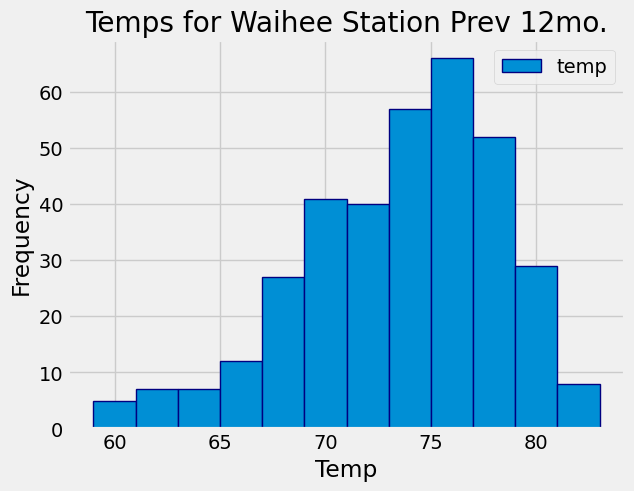

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 
most_active_station = session.query(Measurement.tobs).\
                        filter(Measurement.station == 'USC00519281').\
                        filter(Measurement.date >= year_ago).all()

most_active_station


#and plot the results as a histogram
temp_df = pd.DataFrame(most_active_station, columns=['temp'])
temp_df

temp_df.plot.hist(bins=12, linewidth=1, edgecolor='navy')
plt.title('Temps for Waihee Station Prev 12mo.')
plt.xlabel('Temp')
plt.tight_layout
plt.savefig('./Images/station-histogramSav.png')
plt.show()

# Close Session

In [20]:
# Close Session
session.close()